In [2]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [52]:
train = pd.read_csv('/Users/xingobar/Downloads/animal_train.csv')
test = pd.read_csv('/Users/xingobar/Downloads/animal_test.csv')
outcome = train.OutcomeType

In [6]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [17]:
dog_train = train[train['AnimalType'] == 'Dog']
dog_train = dog_train.reset_index()
dog_train_outcome = dog_train.OutcomeType
dog_train.drop(['index','AnimalType','OutcomeType'],axis=1,inplace=True)
dog_test = test[test['AnimalType'] == 'Dog']
dog_test = dog_test.reset_index()
dog_test.drop(['index','AnimalType'],axis=1,inplace=True)


cat_train = train[train['AnimalType'] == 'Cat']
cat_train = cat_train.reset_index()
cat_train_outcome = cat_train.OutcomeType
cat_train.drop(['index','OutcomeType','AnimalType'],axis=1,inplace=True)
cat_test = test[test['AnimalType'] =='Cat']
cat_test = cat_test.reset_index()
cat_test.drop(['index','AnimalType'],axis=1,inplace=True)

In [16]:
dog_train.head()

,AnimalID,Name,DateTime,OutcomeSubtype,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,NaN,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A686464,Pearce,2015-01-31 12:28:00,Foster,Neutered Male,2 years,Pit Bull Mix,Blue/White
2,A667013,NaN,2013-11-15 12:52:00,Partner,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
3,A677334,Elsa,2014-04-25 13:04:00,Partner,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
4,A671784,Lucy,2014-02-04 17:17:00,NaN,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White


In [14]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


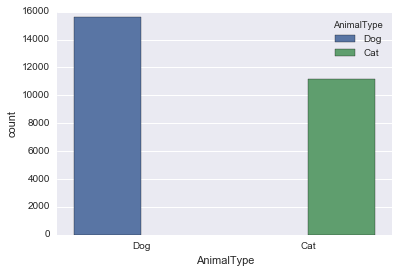

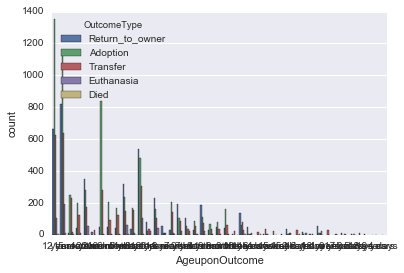

In [23]:
x = train.AnimalType
y = train.OutcomeType
sns.countplot(x,hue=x)
plt.figure(50)
sns.countplot(dog_train.AgeuponOutcome,hue=dog_train_outcome)

In [53]:
### data processing 
train.head()
train_datetime = pd.to_datetime(train.DateTime)
test_datetime = pd.to_datetime(test.DateTime)
train['year'] = train_datetime.dt.year
train['month'] = train_datetime.dt.month
train['day'] = train_datetime.dt.day
train['hour'] = train_datetime.dt.hour
train['minute']= train_datetime.dt.minute
test['year'] = test_datetime.dt.year
test['month'] = test_datetime.dt.month
test['hour'] = test_datetime.dt.hour
test['day'] = test_datetime.dt.day
train.drop(['DateTime'],axis=1,inplace=True)
test.drop(['DateTime'],axis=1,inplace=True)

train['SexuponOutcome'].fillna('Spayed Female',inplace=True)
test['SexuponOutcome'].fillna('Spaed Female',inplace=True)

def convert_sex_to_numeric(columns):
    try:
        columns = columns.split()
    except:
        return 0
    if columns[0] == 'Neutered' or columns[0] == 'Spayed':
        return 2
    elif columns[0] == 'Intact' :
        return 1
    else:
        return 0 
train['viriginity'] = train['SexuponOutcome'].apply(convert_sex_to_numeric)
test['viriginity'] = test['SexuponOutcome'].apply(convert_sex_to_numeric)




In [54]:
train.head()

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,year,month,day,hour,minute,viriginity
0,A671945,Hambone,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,2014,2,12,18,22,2
1,A656520,Emily,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2013,10,13,12,44,2
2,A686464,Pearce,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2015,1,31,12,28,2
3,A683430,NaN,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,2014,7,11,19,9,1
4,A667013,NaN,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2013,11,15,12,52,2


In [55]:
## process age
train['AgeuponOutcome'].fillna('1 month',inplace=True)
test['AgeuponOutcome'].fillna('1 month',inplace=True)

def process_age(age):
    Age_list = age.split()
    Age = int(Age_list[0])
    if(Age_list[1].find('s')):
        Age_list[1] = Age_list[1].replace('s','')
    if Age_list[1] == 'year':
        return Age*365
    elif Age_list[1] =='weeks':
        return Age*7
    elif Age_list[1] == 'months':
        return Age*30
    else:
        return Age
train['AgeuponOutcome'] = train['AgeuponOutcome'].apply(process_age)
test['AgeuponOutcome'] = test['AgeuponOutcome'].apply(process_age)

In [58]:
## process name
def check_has_name(name):
    if type(name) is str:
        return 1
    else:
        return 0
train['has_name'] = train['Name'].apply(check_has_name)
test['has_name'] = test['Name'].apply(check_has_name)
train.drop(['Name'],axis=1,inplace=True)
test.drop(['Name'],axis=1,inplace=True)

In [59]:
train.apply(lambda x:sum(x.isnull()))

AnimalID              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        0
AgeuponOutcome        0
Breed                 0
Color                 0
year                  0
month                 0
day                   0
hour                  0
minute                0
viriginity            0
has_name              0
dtype: int64

In [60]:
train.head()

,AnimalID,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,year,month,day,hour,minute,viriginity,has_name
0,A671945,Return_to_owner,NaN,Dog,Neutered Male,365,Shetland Sheepdog Mix,Brown/White,2014,2,12,18,22,2,1
1,A656520,Euthanasia,Suffering,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby,2013,10,13,12,44,2,1
2,A686464,Adoption,Foster,Dog,Neutered Male,730,Pit Bull Mix,Blue/White,2015,1,31,12,28,2,1
3,A683430,Transfer,Partner,Cat,Intact Male,3,Domestic Shorthair Mix,Blue Cream,2014,7,11,19,9,1,0
4,A667013,Transfer,Partner,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan,2013,11,15,12,52,2,0
